In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('https://hands-on.cloud/wp-content/uploads/2022/01/customer_purchases.csv')

# split the data into inputs and outputs
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

In [3]:
print(dataset.Purchased)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [6]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
y_pred = classifier.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


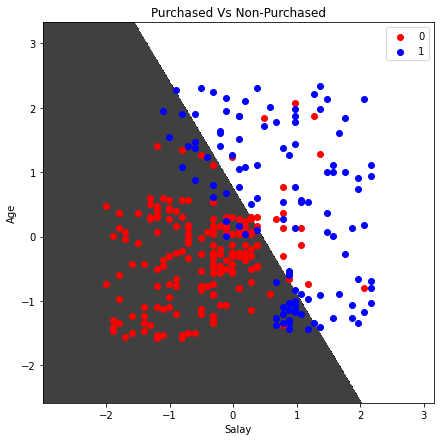

In [8]:
from matplotlib.colors import ListedColormap
import numpy as np

# plotting the fgiure
plt.figure(figsize = (7,7))

# assigning the input values
X_set, y_set = X_train, y_train

# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salay')
plt.ylabel('Age')
plt.legend()
plt.show()

In [10]:
classifier1 = SVC(kernel='rbf')

# traininf the model
classifier1.fit(X_train, y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.93


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


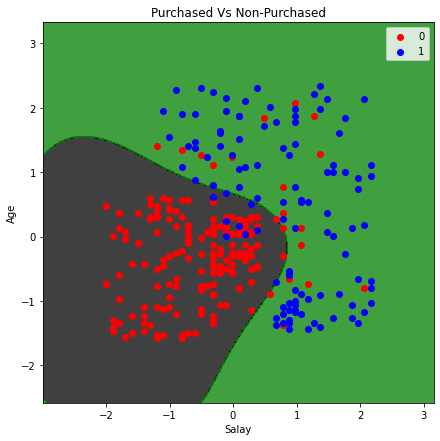

In [11]:
plt.figure(figsize = (7,7))

# assigning the input values
X_set, y_set = X_train, y_train

# ploting the linear graph
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salay')
plt.ylabel('Age')
plt.legend()
plt.show()

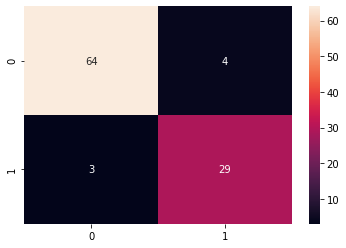

In [12]:
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [13]:
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

